In [6]:
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline


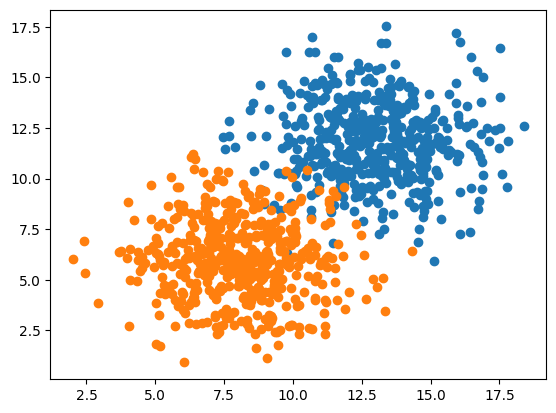

In [7]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T

X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [10]:
model = Sequential()
model.add(Dense(units = 1, input_shape=(2,), activation='sigmoid'))
adam = Adam(lr = 0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=y, verbose=1, batch_size=50, epochs=500, shuffle='true')


Epoch 1/500
20/20 [==============================] - 1s 2ms/step - loss: 16.4085 - accuracy: 0.5000
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 16.1526 - accuracy: 0.5000
Epoch 3/500
20/20 [==============================] - 0s 2ms/step - loss: 15.8985 - accuracy: 0.5000
Epoch 4/500
20/20 [==============================] - 0s 2ms/step - loss: 15.6449 - accuracy: 0.5000
Epoch 5/500
20/20 [==============================] - 0s 2ms/step - loss: 15.3858 - accuracy: 0.5000
Epoch 6/500
20/20 [==============================] - 0s 2ms/step - loss: 15.1315 - accuracy: 0.5000
Epoch 7/500
20/20 [==============================] - 0s 2ms/step - loss: 14.8764 - accuracy: 0.5000
Epoch 8/500
20/20 [==============================] - 0s 2ms/step - loss: 14.6222 - accuracy: 0.5000
Epoch 9/500
20/20 [==============================] - 0s 2ms/step - loss: 14.3620 - accuracy: 0.5000
Epoch 10/500
20/20 [==============================] - 0s 3ms/step - loss: 14.1106 - accuracy: 0.5000

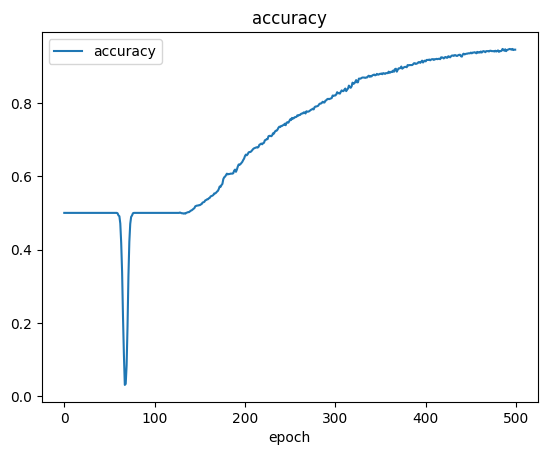

In [11]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

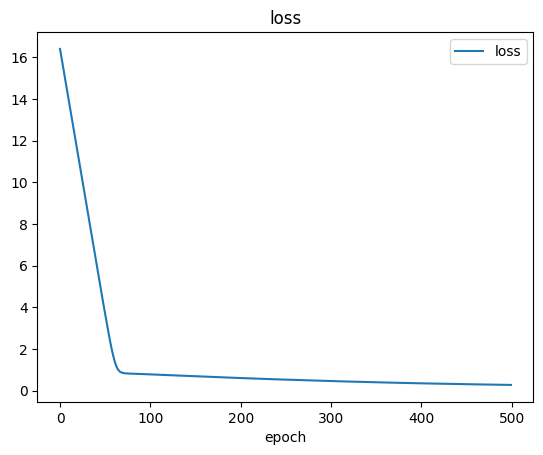

In [12]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [14]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25) # generates linearly spaced array of x-coordinates, ranging from min to max value of X
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span) # Creates a meshgrid. to evaluate the model's prediction at each points on the grid
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)


79/79 [==============================] - 1s 10ms/step


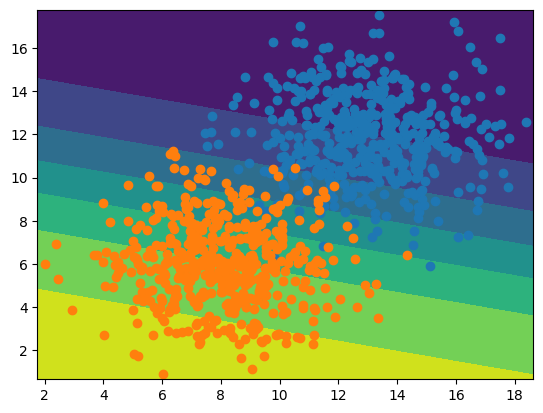

In [18]:
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

1/1 [==============================] - 0s 100ms/step
Prediction is:  [[0.2689343]]


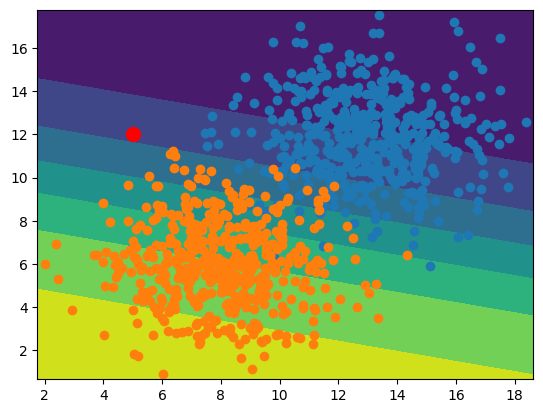

In [21]:
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 5
y = 12

point = np.array([[x, y]])
predict = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is: ", predict)